# How to use the model generator

In [1]:
import numpy as np
import pyvista as pv

from structgeo import model as geo
from structgeo import plot as geovis
from structgeo import probability as rv
from structgeo.plot import ModelGenerator
pv.set_jupyter_backend('static')

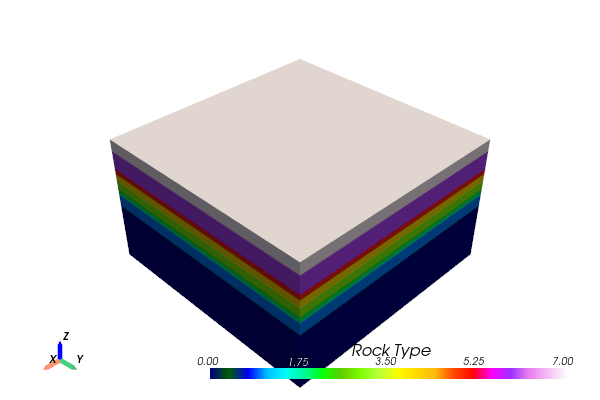

In [4]:
DEFAULT_BASE_DIR = "../saved_models"

# Define a function to generate a model
def generate_model():
    # Start with some model specifications
    resolution = 128
    # Cubic model keeps 
    max_x = 10
    min_x = - max_x
    bounds = (min_x,max_x)
    model = geo.GeoModel(bounds, resolution)
    # Bedrock layer
    bedrock = geo.Bedrock(-5, 0)
    
    sb = geo.SedimentBuilder(1,6,2,8)
    sediment = geo.Sedimentation(*sb.get_layers())
    
    model.add_history([bedrock, sediment])
    model.compute_model()
    return model

model = generate_model()
geovis.volview(model).show(window_size=[600, 400])

In [5]:
reviewer = ModelGenerator(generate_model_func=generate_model, base_dir=DEFAULT_BASE_DIR)
reviewer.start_review()

Output()

Model saved to ../saved_models\model_0.pkl
